In [1]:
import pandas as pd
import json 
import requests 
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


api_key = "9BBBELQU69JG4JZNMHKNC8WWJ" 
location = "Berlin"
start_date = datetime(2013,5,15)
end_date = datetime(2023,5,15)


url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/{start_date.strftime("%Y-%m-%d")}/{end_date.strftime("%Y-%m-%d")}?unitGroup=metric&include=days&key={api_key}&contentType=json"
response = requests.get(url)
if response.status_code == 200:
    data = response.json()

df = pd.read_json(data)

df.to_csv("weather_data_From_5_YearsAgo.csv", index=False)



In [2]:
tbl1 = pd.read_csv("weather_data_From_5_YearsAgo.csv.csv")
tbl2 = pd.read_csv("Last 10 years weather.csv")


In [3]:
tbl1

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Berlin,2013-05-15,25.0,8.0,17.3,25.0,5.8,16.9,7.0,55.6,...,28.1,9,NaN,2013-05-15T05:10:21,2013-05-15T20:56:20,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"10385099999,EDDB"
1,Berlin,2013-05-16,26.0,13.0,20.1,26.0,13.0,20.1,9.5,53.5,...,26.0,9,NaN,2013-05-16T05:08:49,2013-05-16T20:57:54,0.21,"Rain, Partially cloudy",Becoming cloudy in the afternoon with early mo...,rain,"10385099999,EDDB"
2,Berlin,2013-05-17,27.0,17.0,22.3,26.7,17.0,22.3,10.7,48.4,...,25.8,8,NaN,2013-05-17T05:07:20,2013-05-17T20:59:26,0.24,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"10385099999,EDDB"
3,Berlin,2013-05-18,21.0,11.0,15.2,21.0,11.0,15.2,12.1,82.4,...,12.8,4,NaN,2013-05-18T05:05:52,2013-05-18T21:00:57,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"10385099999,EDDB"
4,Berlin,2013-05-19,23.0,9.0,16.0,23.0,7.6,15.7,9.3,68.3,...,28.3,9,NaN,2013-05-19T05:04:27,2013-05-19T21:02:27,0.31,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"10385099999,EDDB"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,Berlin,2023-05-11,21.6,10.4,16.8,21.6,10.4,16.8,7.9,60.2,...,21.9,10,10.0,2023-05-11T05:17:35,2023-05-11T20:49:20,0.70,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"00427,07389,00420,03987,00403,E2835,00433,00400"
3649,Berlin,2023-05-12,21.9,10.5,17.2,21.9,10.5,17.2,5.5,47.6,...,24.9,9,10.0,2023-05-12T05:15:54,2023-05-12T20:50:58,0.75,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"00427,07389,00420,03987,00403,E2835,00433,00400"
3650,Berlin,2023-05-13,21.8,11.1,16.5,21.8,11.1,16.5,4.6,47.3,...,21.2,9,10.0,2023-05-13T05:14:16,2023-05-13T20:52:34,0.78,Clear,Clear conditions throughout the day.,clear-day,"00427,00420,03987,00403,E2835,00433,00400"
3651,Berlin,2023-05-14,20.1,9.8,15.2,20.1,8.1,15.1,6.4,57.7,...,12.0,6,10.0,2023-05-14T05:12:39,2023-05-14T20:54:10,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"00427,00420,03987,00403,E2835,00433,00400"


In [4]:
tbl2

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h)
0,01/05/2013,0,13.9,2.4,8.3,2013-05-01T06:29,2013-05-01T21:25,0.0,0.0,14.1,31.7
1,02/05/2013,0,14.7,2.6,9.0,2013-05-02T06:27,2013-05-02T21:27,0.0,0.0,14.7,35.6
2,03/05/2013,1,17.4,2.4,10.8,2013-05-03T06:26,2013-05-03T21:28,0.0,0.0,16.8,37.4
3,04/05/2013,51,14.5,7.2,10.8,2013-05-04T06:24,2013-05-04T21:30,0.6,0.0,25.8,56.9
4,05/05/2013,3,16.7,5.1,11.3,2013-05-05T06:22,2013-05-05T21:31,0.0,0.0,11.7,29.9
...,...,...,...,...,...,...,...,...,...,...,...
3662,11/05/2023,61,16.9,8.1,12.5,2023-05-11T06:13,2023-05-11T21:40,5.4,0.0,10.2,20.2
3663,12/05/2023,53,12.4,8.9,10.7,2023-05-12T06:11,2023-05-12T21:42,1.5,0.0,30.5,59.4
3664,13/05/2023,3,16.5,8.6,11.7,2023-05-13T06:09,2023-05-13T21:43,0.0,0.0,20.9,40.3
3665,14/05/2023,51,19.0,7.1,12.7,2023-05-14T06:08,2023-05-14T21:45,0.3,0.0,10.9,24.1


In [5]:
tbl2 = tbl2.iloc[14:]


In [6]:
len(tbl1)

3653

In [7]:
len(tbl2)

3653

In [8]:
new_df = pd.DataFrame(columns=["location", "date", "Temp_Max", "Temp_Min", "Temp_Ave", "Feels_Like", "humidity", "Snow", "Rain", "Wind_Speed", "Cloud_Conver", "Sunrise", "Sunset", "Description"])


In [9]:
def calculate_average_date(date1, date2):
    date2 = date2 + ':00'
    dt1 = datetime.strptime(date1, '%Y-%m-%dT%H:%M:%S')
    dt2 = datetime.strptime(date2, '%Y-%m-%dT%H:%M:%S')

    time_diff = dt2 - dt1
    average_dt = dt1 + (time_diff / 2)
    return average_dt.strftime('%H:%M:%S')

In [10]:
new_df = pd.DataFrame(columns=["location", "date", "Temp_Max", "Temp_Min", "Temp_Ave", "Feels_Like", "humidity", "Snow", "Rain", "Wind_Speed", "Cloud_Conver", "Sunrise", "Sunset", "Description"])

for index, row in tbl1.iterrows():
    rowsTbl2 = tbl2.iloc[index]
    if datetime.strptime(row['datetime'], '%Y-%m-%d').date() == datetime.strptime(rowsTbl2["time"], '%d/%m/%Y').date():
        location = row['name']
        date = row['datetime']
        temp_max = int(row['tempmax']) + int(rowsTbl2["temperature_2m_max (°C)"]) / 2 
        temp_min = int(row['tempmin']) + int(rowsTbl2["temperature_2m_min (°C)"]) / 2
        temp_ave = int(row['temp']) + int(rowsTbl2["temperature_2m_mean (°C)"]) / 2
        feels_like = int(row['feelslike'])
        humidity = int(row['humidity'])
        snow = int(row['snow']) + int(rowsTbl2['snowfall_sum (cm)']) / 2
        rain = int(row['precip']) - int(row['snow']) + int(rowsTbl2['rain_sum (mm)']) / 2
        wind_speed = int(row['windspeed']) + int(rowsTbl2['windspeed_10m_max (km/h)']) / 2
        cloud_cover = str(row['cloudcover']) + '%'
        sunrise = calculate_average_date(row['sunrise'], rowsTbl2["sunrise (iso8601)"])
        sunset = calculate_average_date(row['sunset'], rowsTbl2["sunset (iso8601)"])
        description = row['description']
    else:
        location = row['name']
        date = row['datetime']
        temp_max = row['tempmax']
        temp_min = row['tempmin']
        temp_ave = row['temp']
        feels_like = row['feelslike']
        humidity = row['humidity']
        snow = row['snow']
        rain = row['precip']
        wind_speed = row['windspeed']
        cloud_cover = str(row['cloudcover']) + '%'
        sunrise = row['sunrise']
        sunset = row['sunset']
        description = row['description']
    new_df.loc[len(new_df.index)] = [location,date,temp_max,temp_min,temp_ave,feels_like,humidity,snow,rain,wind_speed,cloud_cover,sunrise,sunset,description] 


In [11]:
new_df.to_csv("Merge weather.csv")

In [12]:
df_weather=pd.read_csv('Merge weather.csv')

In [13]:
df_weather

,Unnamed: 0,location,date,Temp_Max,Temp_Min,Temp_Ave,Feels_Like,humidity,Snow,Rain,Wind_Speed,Cloud_Conver,Sunrise,Sunset,Description
0,0,Berlin,2013-05-15,31.5,11.0,21.5,16,55,0.0,1.0,45.5,27.8%,05:38:10,21:21:40,Partly cloudy throughout the day.
1,1,Berlin,2013-05-16,33.0,15.0,24.5,20,53,0.0,0.5,38.0,57.1%,05:36:24,21:23:27,Becoming cloudy in the afternoon with early mo...
2,2,Berlin,2013-05-17,33.0,19.0,26.5,22,48,0.0,0.0,35.5,65.5%,05:35:10,21:24:43,Partly cloudy throughout the day.
3,3,Berlin,2013-05-18,28.0,14.0,20.0,15,82,0.0,7.0,38.5,78.7%,05:33:26,21:26:28,Partly cloudy throughout the day with rain in ...
4,4,Berlin,2013-05-19,31.0,12.5,22.0,15,68,0.0,0.0,20.5,24.6%,05:32:13,21:27:43,Clearing in the afternoon.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,3648,Berlin,2023-05-11,29.0,14.0,22.0,16,60,0.0,2.5,28.0,56.5%,05:45:17,21:14:40,Becoming cloudy in the afternoon.
3649,3649,Berlin,2023-05-12,27.0,14.0,22.0,17,47,0.0,0.5,40.0,21.6%,05:43:27,21:16:29,Becoming cloudy in the afternoon.
3650,3650,Berlin,2023-05-13,29.0,15.0,21.5,16,47,0.0,0.0,38.0,19.8%,05:41:38,21:17:47,Clear conditions throughout the day.
3651,3651,Berlin,2023-05-14,29.5,12.5,21.0,15,57,0.0,0.0,20.0,44.4%,05:40:19,21:19:35,Partly cloudy throughout the day.


In [14]:
df_weather.index=pd.to_datetime(df_weather.index)

In [15]:
import numpy as np
import tensorflow as tf

day = input("Enter your day: ")
month = input("Enter your month: ")
year = input("Enter your year: ")


df_weather['date'] = pd.to_datetime(df_weather['date'])
filtered_df = df_weather[(df_weather['date'].dt.month == int(month)) & (df_weather['date'].dt.day == int(day))]


filtered_df

2023-06-16 13:43:04.075162: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 13:43:04.120792: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 13:43:04.121481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 13:43:04.990151: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


,Unnamed: 0,location,date,Temp_Max,Temp_Min,Temp_Ave,Feels_Like,humidity,Snow,Rain,Wind_Speed,Cloud_Conver,Sunrise,Sunset,Description
1970-01-01 00:00:00.000000031,31,Berlin,2013-06-15,31.0,15.0,24.5,18,61,0.0,1.5,43.0,52.0%,05:11:29,21:56:06,Partly cloudy throughout the day.
1970-01-01 00:00:00.000000396,396,Berlin,2014-06-15,28.5,14.0,22.0,15,62,0.0,0.0,26.0,19.4%,05:11:31,21:56:03,Clear conditions throughout the day with rain ...
1970-01-01 00:00:00.000000761,761,Berlin,2015-06-15,28.0,17.0,21.5,15,55,0.0,0.0,30.5,47.3%,05:11:32,21:55:59,Clearing in the afternoon.
1970-01-01 00:00:00.000001127,1127,Berlin,2016-06-15,27.5,17.0,22.0,15,90,0.0,6.5,19.5,80.8%,05:11:29,21:56:11,Partly cloudy throughout the day with rain.
1970-01-01 00:00:00.000001492,1492,Berlin,2017-06-15,37.5,17.0,29.0,20,54,0.0,0.0,22.5,75.0%,05:11:30,21:56:07,Partly cloudy throughout the day with late aft...
1970-01-01 00:00:00.000001857,1857,Berlin,2018-06-15,31.0,19.0,26.0,18,63,0.0,0.0,23.5,88.5%,05:11:31,21:56:04,Partly cloudy throughout the day.
1970-01-01 00:00:00.000002222,2222,Berlin,2019-06-15,39.5,26.5,32.0,26,57,0.0,0.0,50.5,2.3%,05:11:32,21:56:00,Clear conditions throughout the day with early...
1970-01-01 00:00:00.000002588,2588,Berlin,2020-06-15,35.0,19.5,28.5,20,56,0.0,0.5,21.0,19.7%,05:11:29,21:56:12,Clear conditions throughout the day.
1970-01-01 00:00:00.000002953,2953,Berlin,2021-06-15,34.5,22.0,29.0,20,62,0.0,0.0,20.5,85.7%,05:11:30,21:56:09,Partly cloudy throughout the day.
1970-01-01 00:00:00.000003318,3318,Berlin,2022-06-15,37.0,13.5,27.0,18,54,0.0,0.0,19.0,36.5%,05:11:31,21:56:06,Clearing in the afternoon.


In [16]:
arrays = []
dates = np.array(filtered_df["date"])
temperatures = np.array(filtered_df["Temp_Ave"])
feelsLike = np.array(filtered_df["Feels_Like"])
humidity = np.array(filtered_df["humidity"])
wind_Speed = np.array(filtered_df["Wind_Speed"])	
rain = np.array(filtered_df["Rain"])



model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


model.compile(loss='mean_squared_error', optimizer='adam')


x = np.array([int(np.datetime_as_string(dates[i], unit='Y')) for i in range(len(temperatures))])

model.fit(x, temperatures, epochs=1000, verbose=0)



arrays.append("Berlin")
arrays.append(str(day) +"-" + str(month)+"-"+ str(year))
model.fit(x, temperatures, epochs=1000, verbose=0)
arrays.append(model.predict([int(year)])[0][0])
model.fit(x, feelsLike, epochs=1000, verbose=0)
arrays.append(model.predict([int(year)])[0][0])
model.fit(x, humidity, epochs=1000, verbose=0)
arrays.append(model.predict([int(year)])[0][0])
model.fit(x, rain, epochs=1000, verbose=0)
arrays.append(model.predict([int(year)])[0][0])
model.fit(x, wind_Speed, epochs=1000, verbose=0)
arrays.append(model.predict([int(year)])[0][0])
arrays

1/1 [==============================] - 0s 29ms/step


['Berlin', '15-6-2024', 26.190731, 18.562075, 61.59404, 0.85202336, 27.683681]

In [17]:
forecast_wheter = pd.DataFrame(columns=["location", "date",  "Temp_Ave", "Feels_Like", "humidity",  "Rain", "Wind_Speed"])
forecast_wheter.loc[len(forecast_wheter.index)] = arrays
forecast_wheter

,location,date,Temp_Ave,Feels_Like,humidity,Rain,Wind_Speed
0,Berlin,15-6-2024,26.190731,18.562075,61.59404,0.852023,27.683681


In [18]:
forecast_wheter = pd.DataFrame(columns=["location", "date",  "Temp_Ave", "Feels_Like", "humidity",  "Rain", "Wind_Speed"])
forecast_wheter.loc[len(forecast_wheter.index)] = arrays
forecast_wheter

,location,date,Temp_Ave,Feels_Like,humidity,Rain,Wind_Speed
0,Berlin,15-6-2024,26.190731,18.562075,61.59404,0.852023,27.683681


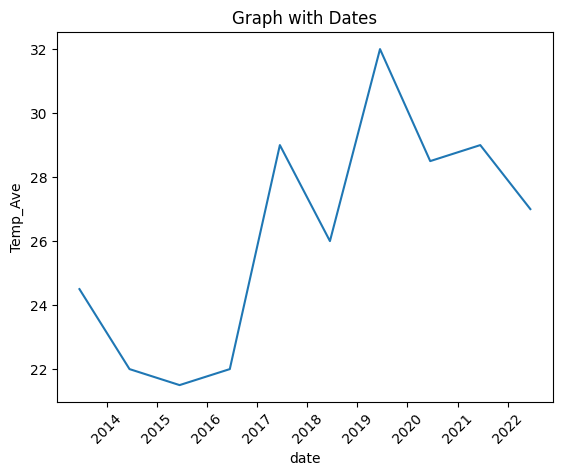

In [19]:
import matplotlib.dates as mdates


df = pd.DataFrame(filtered_df)


df['date'] = pd.to_datetime(df['date'])


plt.plot(df['date'], df['Temp_Ave'])
plt.xlabel('date')
plt.ylabel('Temp_Ave')
plt.title('Graph with Dates')

years = mdates.YearLocator()  
years_fmt = mdates.DateFormatter('%Y') 
ax = plt.gca()  
ax.xaxis.set_major_locator(years)  
ax.xaxis.set_major_formatter(years_fmt) 


plt.xticks(rotation=45)


plt.show()